# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('na_filled_train.csv') # '?' -> NA 변환한 파일 

In [3]:
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,-0.024558,0.30051,0.10733,1.8368,34.382,-0.026711,-0.020067,2.2519,1.06670,0.67673,...,0.062497,-0.036289,0.93750,0.25454,13.6320,3.6930,69.389,5.2602,0.8826,0
1,0.639180,0.00000,1.00000,NaN,29.678,-1.139300,0.760520,NaN,1.11850,1.00000,...,0.679830,0.639180,0.32014,0.00000,NaN,37.8860,0.000,NaN,NaN,0
2,-0.440760,0.47723,0.19260,1.4678,34.555,0.000000,-0.440760,1.0954,1.51860,0.52277,...,-0.290590,-0.843130,1.28710,0.12538,NaN,2.5649,98.950,3.6887,3.8376,0
3,0.119520,0.17679,0.63546,4.5944,117.650,0.251540,0.148750,4.5826,1.12630,0.81017,...,0.112110,0.147520,0.88789,0.00000,8.9302,10.2870,40.355,9.0448,8.5169,0
4,0.230400,0.27095,0.23762,2.5745,-26.928,0.617540,0.282690,2.6907,0.80411,0.72905,...,0.459570,0.316020,0.62320,0.16465,7.9274,6.6605,68.502,5.3283,1.3150,0


In [4]:
print(df.shape)

(6855, 65)


In [5]:
pd.set_option('display.max_rows', 100)

In [6]:
print(df.isnull().sum())

Attr1        0
Attr2        0
Attr3        0
Attr4       28
Attr5       15
Attr6        0
Attr7        0
Attr8       15
Attr9        0
Attr10       0
Attr11       0
Attr12      28
Attr13      14
Attr14       0
Attr15       5
Attr16      15
Attr17      15
Attr18       0
Attr19      14
Attr20      14
Attr21     112
Attr22       0
Attr23      14
Attr24     149
Attr25       0
Attr26      15
Attr27     462
Attr28     162
Attr29       0
Attr30      14
Attr31      14
Attr32      72
Attr33      28
Attr34      15
Attr35       0
Attr36       0
Attr37    3100
Attr38       0
Attr39      14
Attr40      28
Attr41     142
Attr42      14
Attr43      14
Attr44      14
Attr45     418
Attr46      28
Attr47      57
Attr48       0
Attr49      14
Attr50      15
Attr51       0
Attr52      60
Attr53     162
Attr54     162
Attr55       0
Attr56      14
Attr57       1
Attr58      10
Attr59       1
Attr60     420
Attr61      20
Attr62      14
Attr63      28
Attr64     162
class        0
dtype: int64


NA imputation 을 위해, 최대한 구할 수 있는 변수 값들은 구해보자.
(NA 갯수가 0인 Attr 들을 이용)

In [7]:
total_assets = pd.Series(np.exp(df['Attr29']), index=df['Attr29'].index)
assert not bool(total_assets.isnull().sum())

total_equity = df['Attr10']* total_assets
assert not bool(total_equity.isnull().sum())

total_liabilities = total_assets - total_equity
assert not bool(total_liabilities.isnull().sum())

short_term_liabilities =  df['Attr51']  * total_assets
assert not bool(short_term_liabilities.isnull().sum())

long_term_liabilities = total_liabilities - short_term_liabilities
assert not bool(long_term_liabilities.isnull().sum())

total_sales = pd.Series(np.array(short_term_liabilities) * np.array(df['Attr36']))
assert not bool(total_sales.isnull().sum())

sales = total_assets* df['Attr9'].values
assert not bool(sales.isnull().sum())

gross_profit = total_assets * df['Attr18']
assert not bool(gross_profit.isnull().sum())

EBIT = total_assets * df['Attr7']
assert not bool(EBIT.isnull().sum())

EBITDA = total_assets * df['Attr48']
assert not bool(EBITDA.isnull().sum())

retained_earnings = total_assets * df['Attr6']
assert not bool(retained_earnings.isnull().sum())

net_profit = total_assets * df['Attr1']
assert not bool(net_profit.isnull().sum())

working_capital = total_assets * df['Attr3']
profit_on_sales = total_assets * df['Attr35']

working_capital.isnull().sum()
profit_on_sales.isnull().sum()

0

total_assets, total_equity, total_liabilities, short_term_liabilities, long_term_liabilities, total_sales, sales, gross_propit, retained_earnings, EBIT, EBITDA, net_profit, working_capital, profit_on_sales 을 구할 수 있었다.

## NA imputation 시작~ 전에! 잠깐

### 1. 보다 정확한 NA imputation을 위해 outliers 제거하자. (판단의 기준은 density plot 으로)
### 아래 예시

In [8]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


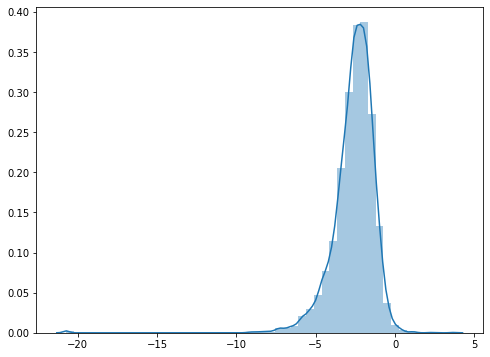

In [9]:
fig = plt.figure(figsize = (8,6))
sns.distplot(np.log(df['Attr11'].dropna().replace(0, 1e-9).values))
plt.show()

In [10]:
df['Attr11'].sort_values(ascending=False).index[0]

4994

이런 방식으로 index를 찾아, outliers 제거한 csv 를 다시 불러옴

In [11]:
df=pd.read_csv('outlier_removed_train.csv') # '?' -> NA 변환 & density plot 그린 후 outliers (19 rows) 제거한 파일 


### 2. 변수가 갖고 있는 정보가 겹칠 경우, 삭제해주도록 하자.

In [12]:
drop_list = []
for i in (15,17,19,20,28,31,34,37,41,42,44,46,55,57,62):
    drop_list.append("Attr" + str(i))
    
df.drop(drop_list, axis=1, inplace=True)

In [13]:
df.shape #총 15개의 columns 를 제거

(6836, 50)

In [14]:
print(df.isnull().sum())

Attr1       0
Attr2       0
Attr3       0
Attr4       0
Attr5      15
Attr6       0
Attr7       0
Attr8      14
Attr9       0
Attr10      0
Attr11      0
Attr12     26
Attr13     13
Attr14      0
Attr16     14
Attr18      0
Attr21    110
Attr22      0
Attr23     13
Attr24    149
Attr25      0
Attr26     14
Attr27    459
Attr29      0
Attr30     13
Attr32     71
Attr33     26
Attr35      0
Attr36      0
Attr38      0
Attr39     13
Attr40     26
Attr43     13
Attr45    410
Attr47     56
Attr48      0
Attr49     13
Attr50     14
Attr51      0
Attr52     59
Attr53    159
Attr54    159
Attr56     13
Attr58      9
Attr59      1
Attr60    412
Attr61     19
Attr63     26
Attr64    159
class       0
dtype: int64


참고) 여기서  Attr4는 current_assets 가 na imputation 된 값이 입력되어있음.
순서가 꼬여서 이렇게 되었으나, 이후 코딩에서 별 문제는 없음.

current_assets를 먼저 imputation한 이유는 이와 연관된 변수가 많아서였음.

current_assets 정보가 들어가 있는 변수 중 NA 갯수가 가장 적은 변수를 선택하여 imputation함.
(코드는 아래와 같음)

In [15]:
current_assets = df['Attr50'] * total_liabilities
#print(current_assets.isnull().sum())

current_assets.fillna(30.04, inplace=True)
assert not bool(current_assets.isnull().sum())

## 이제 진짜 NA imputation 시작한다!
### 1. 위에서 뽑은 변수들로 NA를 직접 imputation할 수 있는 경우는 직접 imputation
### 2. otherwise - NA imputation packages 사용

### 1)의 경우로 설명이 되는 변수들은, 
### X12, X23, X39, X49, X50, X59, X63

In [16]:
# 0이 존재하는 값에 1e-9 더해줌

for i in range(0, 6836):
    if short_term_liabilities[i] == 0:
        short_term_liabilities[i] += short_term_liabilities[i]+(1e-9)
        
for i in range(0, 6836):
    if sales[i] == 0:
        sales[i] += sales[i]+(1e-9)
        
for i in range(0, 6836):
    if total_liabilities[i] == 0:
        total_liabilities[i] += total_liabilities[i]+(1e-9)
        
for i in range(0, 6836):
    if total_equity[i] == 0:
        total_equity[i] += total_equity[i]+(1e-9)

In [17]:
# NA imputation

for i in range(0,6836):
    if df.loc[i,'Attr12'] != float('NaN'):
        df.loc[i,'Attr12'] = gross_profit[i] / short_term_liabilities[i]

for i in range(0,6836):
    if df.loc[i,'Attr23'] != float('NaN'):
        df.loc[i,'Attr23'] = net_profit[i] / sales[i]

for i in range(0,6836):
    if df.loc[i,'Attr39'] != float('NaN'):
        df.loc[i,'Attr39'] = profit_on_sales[i] / sales[i]

for i in range(0,6836):
    if df.loc[i,'Attr49'] != float('NaN'):
        df.loc[i,'Attr49'] = EBITDA[i] / sales[i]

for i in range(0,6836):
    if df.loc[i,'Attr50'] != float('NaN'):
        df.loc[i,'Attr50'] = current_assets[i] / total_liabilities[i]

for i in range(0,6836):
    if df.loc[i,'Attr59'] != float('NaN'):
        df.loc[i,'Attr59'] = long_term_liabilities[i] / total_equity[i]

for i in range(0,6836):
    if df.loc[i,'Attr63'] != float('NaN'):
        df.loc[i,'Attr63'] = sales[i] / short_term_liabilities[i]

In [18]:
# na 값 있나 확인
df.loc[:, ['Attr12','Attr23','Attr39','Attr49','Attr50','Attr59','Attr63']].isnull().sum()

Attr12    0
Attr23    0
Attr39    0
Attr49    0
Attr50    0
Attr59    0
Attr63    0
dtype: int64

##  이제 2)의 방법으로 NA 할 차례

NA 개수 확인해보자.(시각화)

In [19]:
import missingno as msno

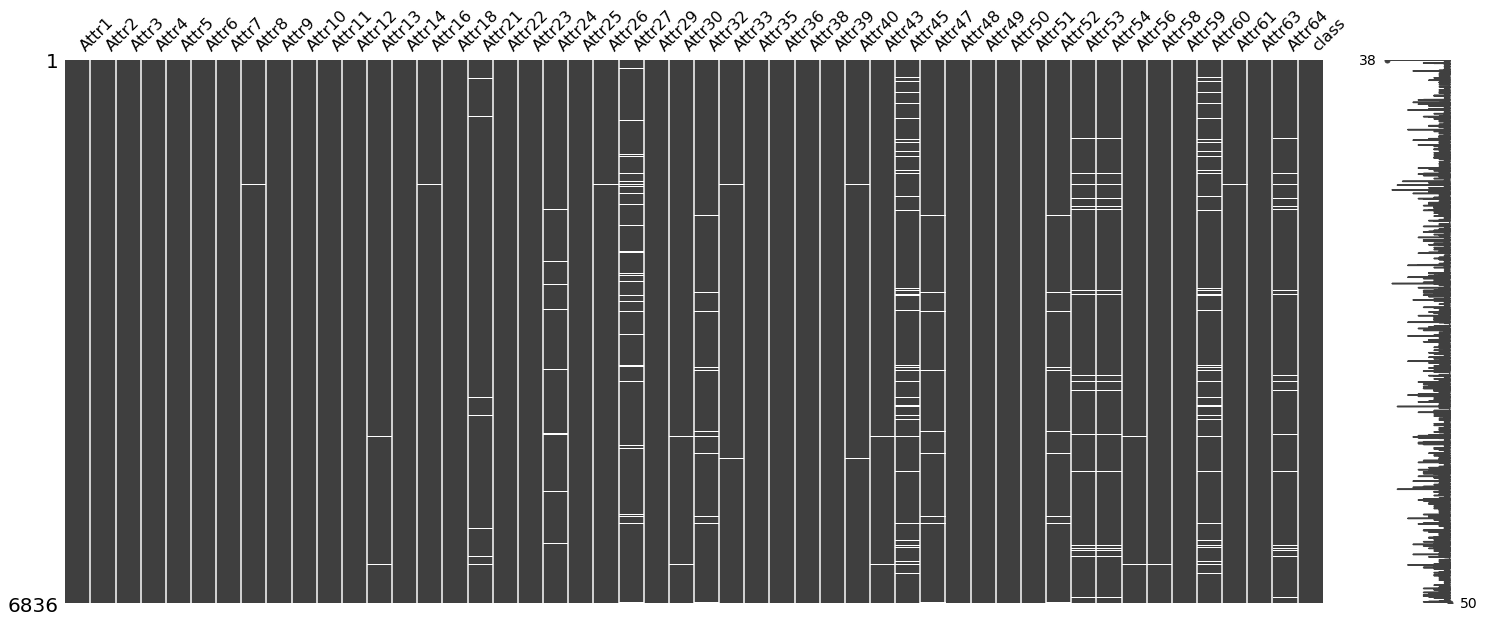

In [20]:
msno.matrix(df)

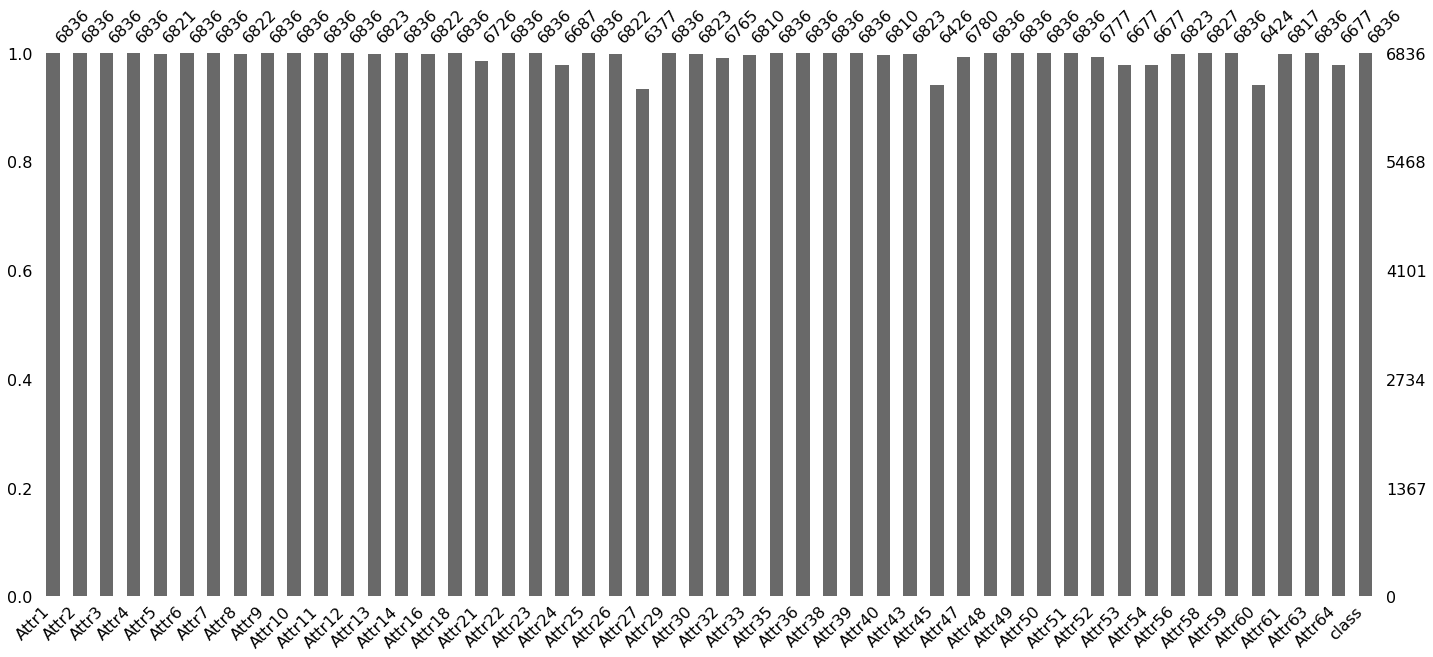

In [21]:
msno.bar(df) #갯수 확인이 용이

In [22]:
from IPython.display import Image #사진첨부를 위함

## sklearn의 IterativeImputer를 써보자

### 다중 대체법을 이용한 결측치 대체
* 다중대체법이란? 

    (Multiple Imputation)
    결측값의 불확실성을 보존하면서, 
    
    기존의 데이터를 사용하여 결측값을
    실제값 (real value)으로 추정된 몇 개의 값 (approximating)으로 만들어 (또는 대체) 내어 분석하는 방법
    
    
    여러개의 결측치가 대체된 데이터 셋을 생성하여 결측치를 대체 함에 오류를 줄어드는 장점이 있습니다

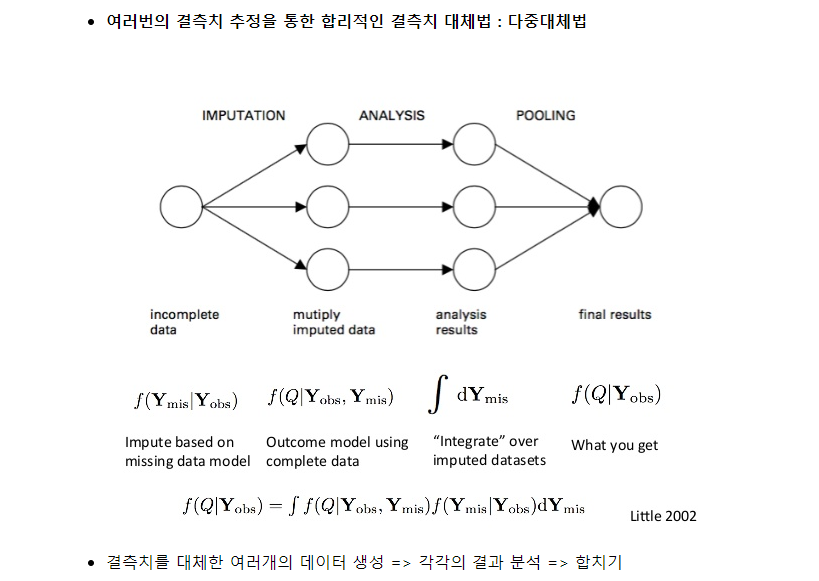

In [23]:
Image(filename="iterative.png") #그렇다고 한다...

In [51]:
# 사이킷런에서 impute 를 하려면 두가지의 매서드를 불러와야됨
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [52]:
# IterativeImputer 메서드 사용(verbose=0 는 실행결과를 반복 출력하는 것을 막기위해 설정)
imp = IterativeImputer(max_iter=10, random_state=10, verbose=0)
imp.fit(df)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=10,
                 sample_posterior=False, skip_complete=False, tol=0.001,
                 verbose=0)

In [53]:
imputed_df = imp.transform(df) #array 형식으로 출력됨.
imputed_df = pd.DataFrame(imputed_df, columns=df.columns)

In [54]:
imputed_df.shape

(6836, 50)

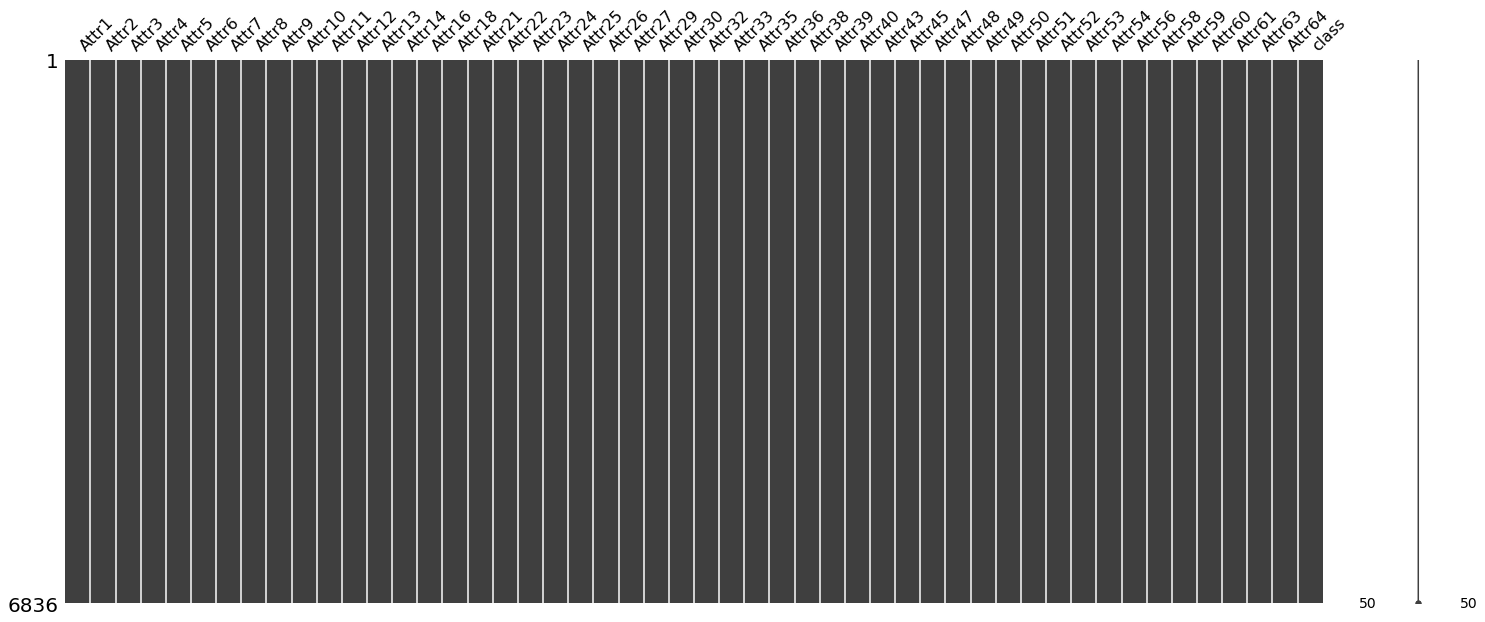

In [55]:
msno.matrix(imputed_df)

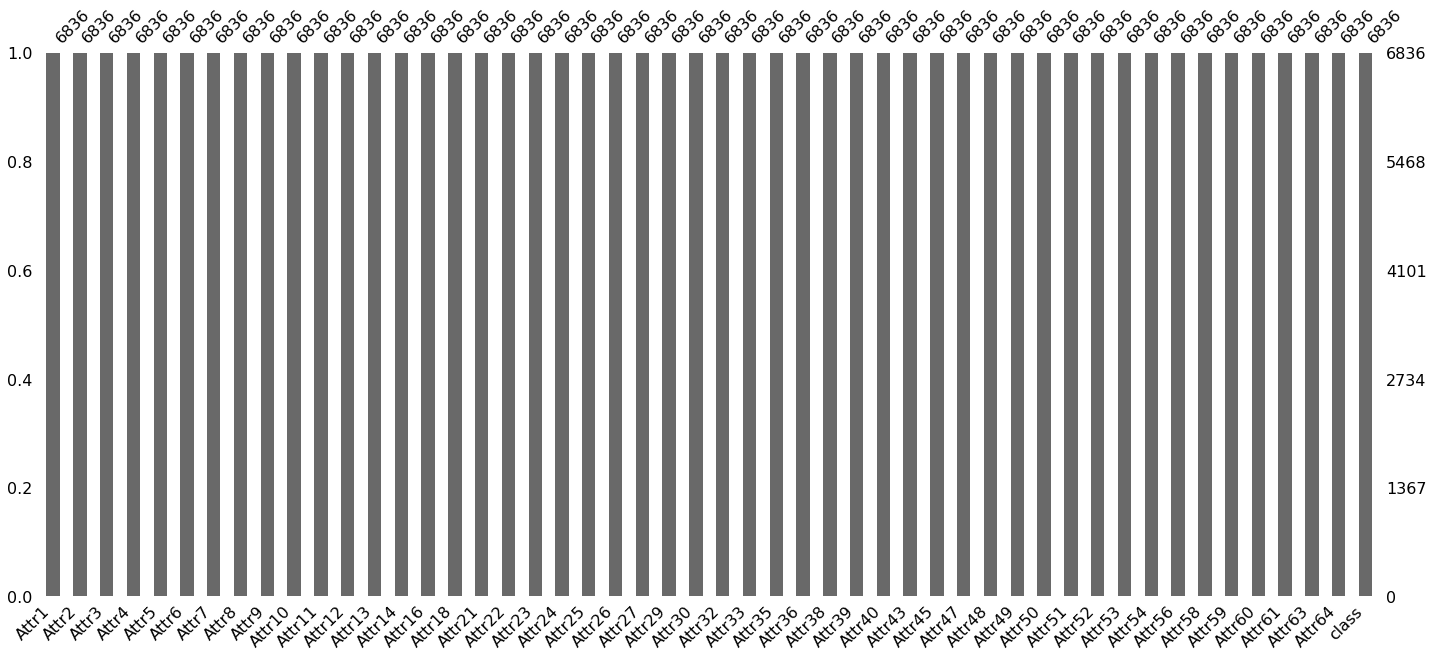

In [56]:
msno.bar(imputed_df)  #na가 하나도 없이 잘 처리되었다. 성능을 보자.

In [197]:
from sklearn.model_selection import train_test_split

In [198]:
X = imputed_df.iloc[:,range(0,49)]
y = imputed_df.iloc[:,49]

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state=11)

In [200]:
X_train.shape
X_test.shape

(2051, 49)

In [201]:
from sklearn.linear_model import LogisticRegression

In [202]:
LR_iter = LogisticRegression(class_weight='balanced')
LR_iter = LR_iter.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [203]:
print(LR_iter.score(X_train, y_train))
print(LR_iter.score(X_test, y_test))

0.7072100313479623
0.7016089712335446


sklearn의 iterative imputer는 75% 정도의 성능을 보인다.

## KNN을 써보자.
KNN은 data의 imbalance에 민감하게 반응하므로 y=0,1로 나누어 imputation한다.

In [204]:
df_0 = df[df.iloc[:,49]==0]
df_0.describe()
df_0.shape

(6475, 50)

In [205]:
df_1 = df[df.iloc[:,49]==1]
df_1.describe()
df_1.shape

(361, 50)

In [206]:
from sklearn.impute import KNNImputer

In [207]:
knn_0 = KNNImputer(n_neighbors=5)
knn_0.fit(df_0)

knn_1 = KNNImputer(n_neighbors=5)
knn_1.fit(df_1)

KNNImputer(add_indicator=False, copy=True, metric='nan_euclidean',
           missing_values=nan, n_neighbors=5, weights='uniform')

In [208]:
imputed_df_0 = knn_0.fit_transform(df_0) #array로 출력
imputed_df_0= pd.DataFrame(imputed_df_0, columns=df.columns) #df로 만들자.
print(imputed_df_0.shape)

imputed_df_1 = knn_1.fit_transform(df_1)
imputed_df_1= pd.DataFrame(imputed_df_1, columns=df.columns) #df로 만들자.
print(imputed_df_1.shape)

(6475, 50)
(361, 50)


In [209]:
imputed_df_knn = pd.concat([imputed_df_0, imputed_df_1]) #y=0,1 dataframe을 합친다.

In [210]:
imputed_df_knn.shape

(6836, 50)

이제 다시 train, test set 나누고 성능 평가해보자.

In [211]:
X = imputed_df_knn.iloc[:,range(0,49)]
y = imputed_df_knn.iloc[:,49]

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state=11)

In [213]:
X_train.shape
X_test.shape

(2051, 49)

In [214]:
LR_knn = LogisticRegression(class_weight='balanced')
LR_knn = LR_knn.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [215]:
print(LR_knn.score(X_train, y_train))
print(LR_knn.score(X_test, y_test))

0.6996865203761755
0.7025841053144808


In [216]:
print("LR iterative imputation:", LR_iter.score(X_test, y_test))
print("LR KNN:", LR_knn.score(X_test, y_test))

LR iterative imputation: 0.6991711360312043
LR KNN: 0.7025841053144808
